In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
dataset = pd.read_csv('ex1data1.txt', sep = ",", header= None)

In [84]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1:].values
m = y.shape[0]

Text(0, 0.5, 'Profit in $100,000s')

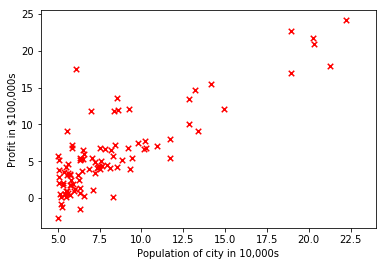

In [85]:
plt.scatter(X, y, marker='x', s=30, color='red', linewidths=2)
plt.xlim(4, 24)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $100,000s')

In [86]:
X =  np.c_[np.ones(X.shape[0]), X] # Adding a column of ones to x
theta = np.zeros((2, 1)) # Initialize fitting parameters
iterations = 1500
alpha = 0.01


In [87]:
def compute_cost(X, y, theta):
    m = np.size(y)
    J = 0
    h = X.dot(theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J
    

In [88]:
compute_cost(X, y, theta)

32.072733877455676

In [89]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = np.size(y)
    J_iterations = np.zeros(iterations)
    for iter in np.arange(iterations):
        J_iterations[iter] = compute_cost(X, y, theta)
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot(h - y))
    return theta, J_iterations

In [90]:
theta, cost_J = gradient_descent(X, y, theta, alpha, iterations)

theta:  [-3.63029144  1.16636235]


Text(0, 0.5, 'Iterations')

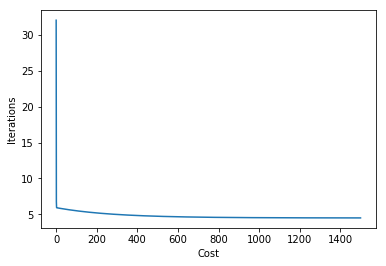

In [92]:
print('theta: ', theta.ravel())
plt.plot(cost_J)
plt.xlabel('Cost')
plt.ylabel('Iterations')

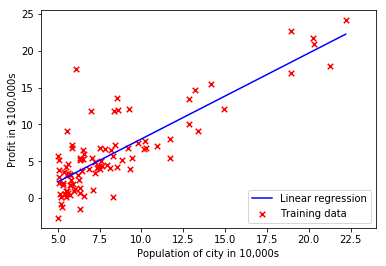

In [116]:
plt.scatter(X[:, 1], y, marker='x', s=30, color='red', linewidths=2, label='Training data')
X_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_range = theta[0] + theta[1] * X_range
plt.plot(X_range, y_range, 'b-', label='Linear regression')
plt.xlim(4, 24)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $100,000s')
plt.legend(loc=4)

In [156]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = compute_cost(X, y, [theta0, theta1])

In [158]:
J_vals = J_vals.T

Text(0.5, 0.92, 'Surface')

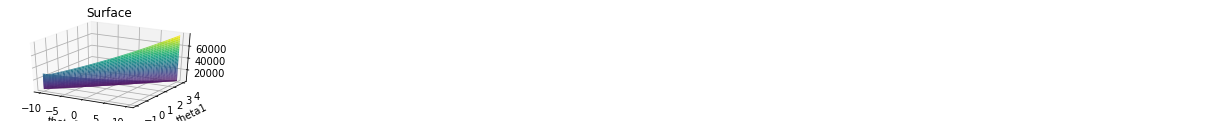

In [169]:
from mpl_toolkits.mplot3d import Axes3D 
# Surface Plot
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

Text(0, 0.5, 'theta1')

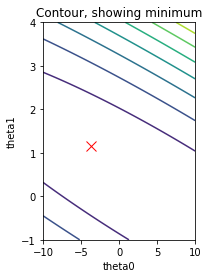

In [194]:
# contour plot
ax = plt.subplot(122)
# contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.contour(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)
plt.title('Contour, showing minimum')
plt.xlabel('theta0')
plt.ylabel('theta1')